In [1]:
import os
import shutil

def rename_wav_files(root_directory):
    # Ensure the root_directory path ends with a slash for correct path joining
    root_directory = root_directory.rstrip(os.path.sep) + os.path.sep

    # Traverse through all directories and subdirectories
    for dirpath, dirnames, filenames in os.walk(root_directory):
        for filename in filenames:
            if filename.endswith(".wav"):
                # Construct the full path of the original filename
                src = os.path.join(dirpath, filename)

                # Split the filename into parts using whitespace as separator
                parts = filename.split()

                # Extract the relevant parts for renaming
                if len(parts) >= 4:  # Ensure the filename structure is as expected
                    new_filename = f"{parts[0]} {parts[1]} {parts[2]}.wav"
                    dst = os.path.join(dirpath, new_filename)

                    # Rename the file
                    shutil.move(src, dst)
                    print(f"Renamed '{filename}' to '{new_filename}'")

if __name__ == "__main__":
    # Prompt the user to input the root directory path
    root_directory_path = r"D:\Semester Project - Listening Tests\webMUSHRA\configs\resources"
    
    # Call the function to rename the .wav files in the specified root directory and its subdirectories
    rename_wav_files(root_directory_path)

    



              trial_id rating_reference rating_non_reference  \
4    Low Instrumentals        reference                  C11   
47   Low Instrumentals        reference                  C11   
48   Low Instrumentals        reference                  C10   
49   Low Instrumentals        reference                   C4   
50   Low Instrumentals        reference                  C12   
..                 ...              ...                  ...   
75  High Instrumentals        reference                   C6   
65  High Instrumentals        reference                   C7   
26  High Instrumentals        reference                   C5   
66  High Instrumentals        reference                   C8   
38  High Instrumentals        reference                   C1   

    rating_reference_score  rating_non_reference_score  
4                     5.00                        4.70  
47                    2.72                        5.00  
48                    5.00                        3.88  
49 

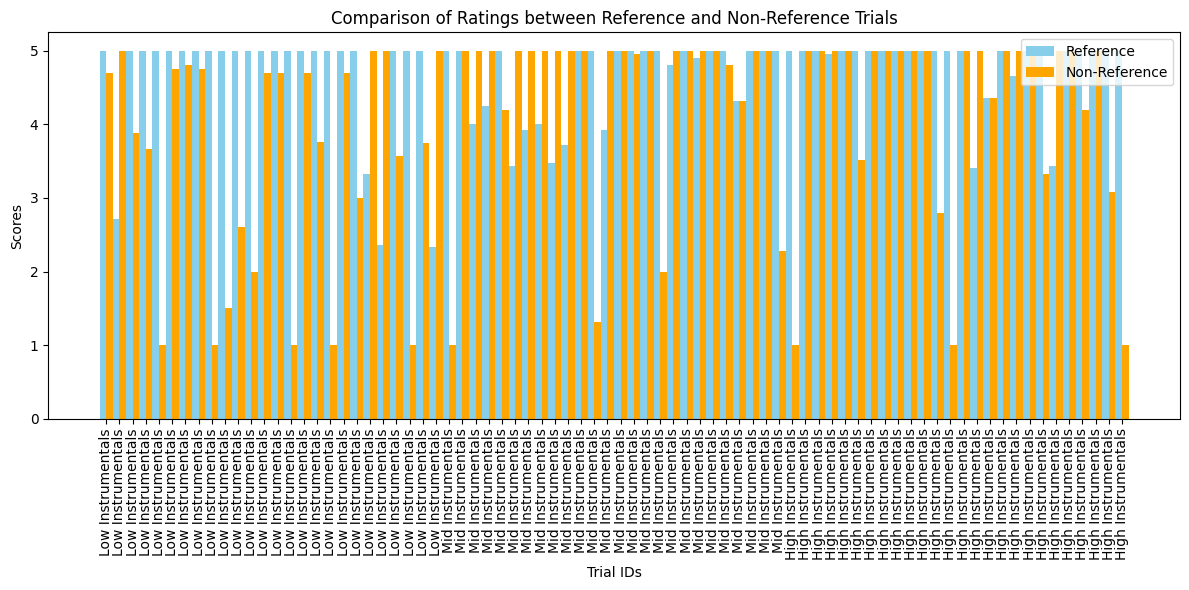

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('results/low_mid_high_instrumentals/bs1116.csv')

columns_to_extract = [
    'trial_id',
    'rating_reference',
    'rating_non_reference',
    'rating_reference_score',
    'rating_non_reference_score'
]

df_sorted_NEW = df[columns_to_extract]

df_sorted_NEW.to_csv("SORTED_NEW.csv", index=False)


df = pd.read_csv('SORTED_NEW.csv')

# Sort the DataFrame based on the trial_id column
df_sorted = df.sort_values(by='trial_id', ascending=True)

# Assuming df_sorted is your sorted DataFrame
trial_ids = df_sorted['trial_id']
trial_label_reference = df_sorted['rating_reference']
trial_label_nonreference = df_sorted['rating_non_reference']
#print(trial_ids)
#print(trial_label_reference)
#print(trial_label_nonreference)

# Define the desired order of categories
category_order = ['Low Instrumentals', 'Mid Instrumentals', 'High Instrumentals']

# Convert trial_ids to categorical type with specified order
trial_ids = pd.Categorical(trial_ids, categories=category_order, ordered=True)

# Assign the sorted categorical series back to the DataFrame
df_sorted['trial_id'] = trial_ids

# Sort the DataFrame based on the trial_id column
df_sorted = df_sorted.sort_values(by='trial_id')

print(df_sorted)
df_sorted.to_csv("SORTED_NEW_NEW.csv", index=False)

# Extract relevant data for plotting
trial_ids = df_sorted['trial_id']
reference_scores = df_sorted[df_sorted['rating_reference'] == 'reference']['rating_reference_score']
non_reference_scores = df_sorted[df_sorted['rating_reference'] == 'reference']['rating_non_reference_score']

# Plotting ratings of reference and non-reference trials side by side
plt.figure(figsize=(12, 6))
bar_width = 0.5
index = np.arange(len(trial_ids))

plt.bar(index, reference_scores, bar_width, label='Reference', color='skyblue')
plt.bar(index + bar_width, non_reference_scores, bar_width, label='Non-Reference', color='orange')

plt.xlabel('Trial IDs')
plt.ylabel('Scores')
plt.title('Comparison of Ratings between Reference and Non-Reference Trials')
plt.xticks(index + bar_width / 2, trial_ids, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

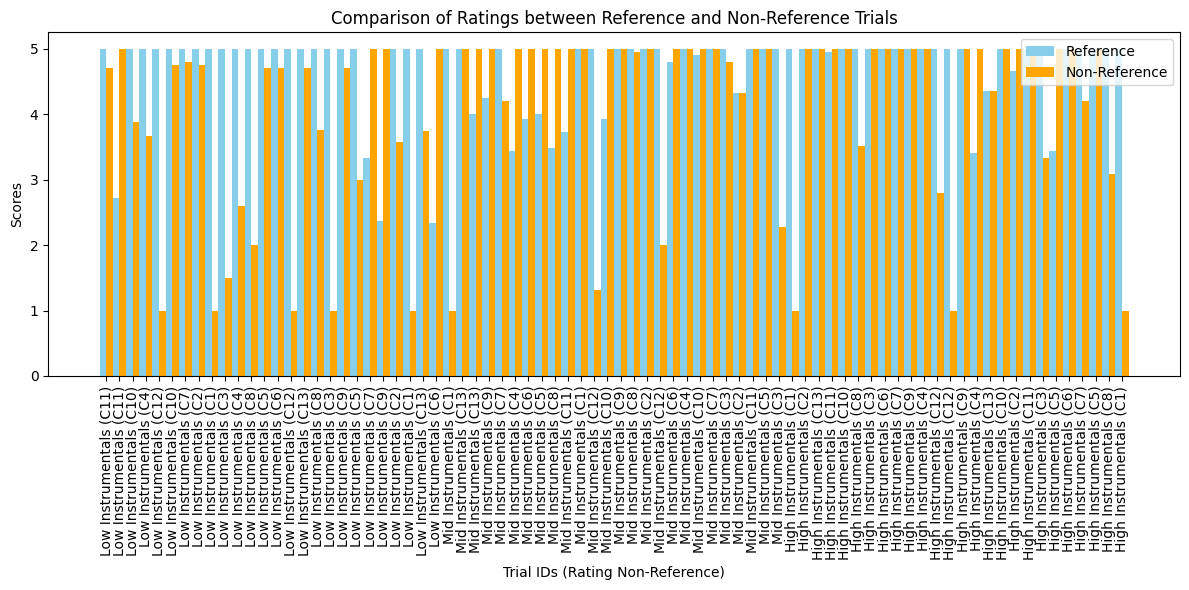

In [3]:
# Load the sorted CSV file
df_sorted = pd.read_csv("SORTED_NEW_NEW.csv")

# Combine trial IDs with rating_non_reference for x-axis labeling
trial_ids_with_non_ref = df_sorted['trial_id'] + ' (' + df_sorted['rating_non_reference'] + ')'

# Update the 'trial_id' column with the new combined trial IDs
df_sorted['trial_id'] = trial_ids_with_non_ref

df_sorted.to_csv("SORTED_NEW_NEW_NEW.csv", index=False)

#df_sorted = pd.read_csv("sorted_output.csv")

# Extract relevant data for plotting
reference_scores = df_sorted[df_sorted['rating_reference'] == 'reference']['rating_reference_score']
non_reference_scores = df_sorted[df_sorted['rating_reference'] == 'reference']['rating_non_reference_score']

# Plotting ratings of reference and non-reference trials side by side
plt.figure(figsize=(12, 6))
bar_width = 0.5
index = np.arange(len(trial_ids_with_non_ref))

plt.bar(index, reference_scores, bar_width, label='Reference', color='skyblue')
plt.bar(index + bar_width, non_reference_scores, bar_width, label='Non-Reference', color='orange')

plt.xlabel('Trial IDs (Rating Non-Reference)')
plt.ylabel('Scores')
plt.title('Comparison of Ratings between Reference and Non-Reference Trials')
plt.xticks(index + bar_width / 2, trial_ids_with_non_ref, rotation=90) # type: ignore
plt.legend()
plt.tight_layout()
plt.show()

CSV file has been sorted and saved as 'sorted_output.csv'.


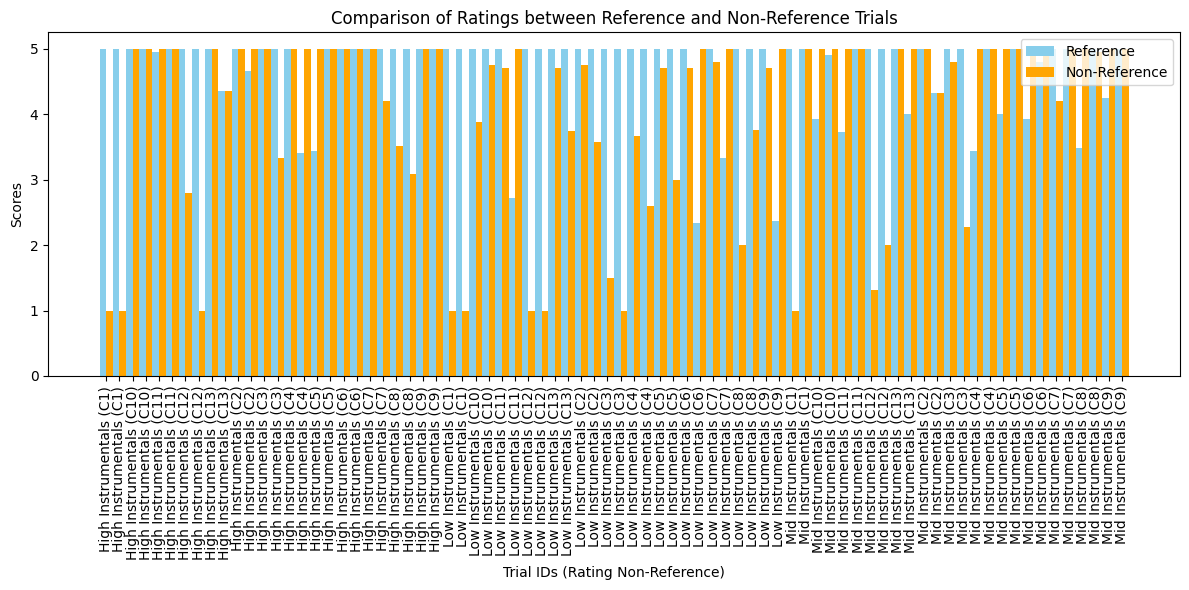

In [8]:
import pandas as pd

# Define the input and output file paths
input_file = "SORTED_NEW_NEW_NEW.csv"
output_file = 'sorted_output.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Extract the trial identifier (last word) from trial_id and create a new column for sorting
df['identifier'] = df['trial_id'].apply(lambda x: x.split()[-1])

# Define the custom sorting order based on the identifier
sorting_order = {
    'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5,
    'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'C10': 10,
    'C11': 11, 'C12': 12, 'C13': 13
}

# Map the sorting order to the identifier column
df['sorting_order'] = df['identifier'].map(sorting_order)

# Sort the DataFrame first by the first two words of trial_id, then by sorting_order
df_sorted = df.sort_values(by=['trial_id', 'sorting_order'])

# Drop the additional sorting columns
df_sorted.drop(['identifier', 'sorting_order'], axis=1, inplace=True)

# Write the sorted DataFrame to a new CSV file
df_sorted.to_csv(output_file, index=False)

print(f"CSV file has been sorted and saved as '{output_file}'.")

df_sorted = pd.read_csv("sorted_output.csv")

# Extract relevant data for plotting
reference_scores = df_sorted[df_sorted['rating_reference'] == 'reference']['rating_reference_score']
non_reference_scores = df_sorted[df_sorted['rating_reference'] == 'reference']['rating_non_reference_score']

# Plotting ratings of reference and non-reference trials side by side
plt.figure(figsize=(12, 6))
bar_width = 0.5
index = np.arange(len(df_sorted["trial_id"]))

plt.bar(index, reference_scores, bar_width, label='Reference', color='skyblue')
plt.bar(index + bar_width, non_reference_scores, bar_width, label='Non-Reference', color='orange')

plt.xlabel('Trial IDs (Rating Non-Reference)')
plt.ylabel('Scores')
plt.title('Comparison of Ratings between Reference and Non-Reference Trials')
plt.xticks(index + bar_width / 2, df_sorted['trial_id'], rotation=90) # type: ignore
plt.legend()
plt.tight_layout()
plt.show()

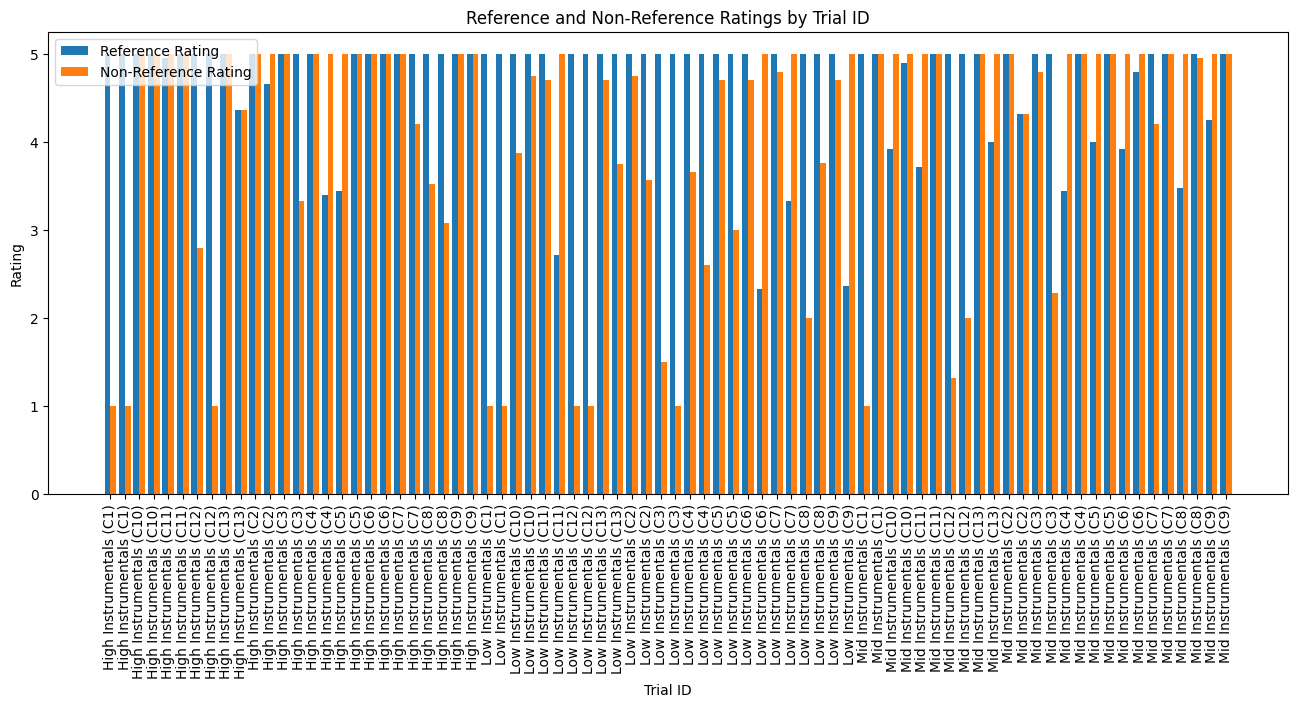

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV into a DataFrame
df = pd.read_csv('sorted_output.csv')

# Sort the DataFrame by trial_id
df_sorted = df.sort_values(by='trial_id')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(16, 6))

# Create a bar plot for reference ratings
ax.bar(df_sorted.index - 0.2, df_sorted['rating_reference_score'], width=0.4, label='Reference Rating')

# Create a bar plot for non-reference ratings
ax.bar(df_sorted.index + 0.2, df_sorted['rating_non_reference_score'], width=0.4, label='Non-Reference Rating')

# Set the title and labels
ax.set_title('Reference and Non-Reference Ratings by Trial ID')
ax.set_xlabel('Trial ID')
ax.set_ylabel('Rating')

# Set the x-ticks to be the trial_ids and rotate them for better visibility
ax.set_xticks(df_sorted.index)
ax.set_xticklabels(df_sorted['trial_id'], rotation=90)

# Add a legend
ax.legend()

# Show the plot
plt.show()

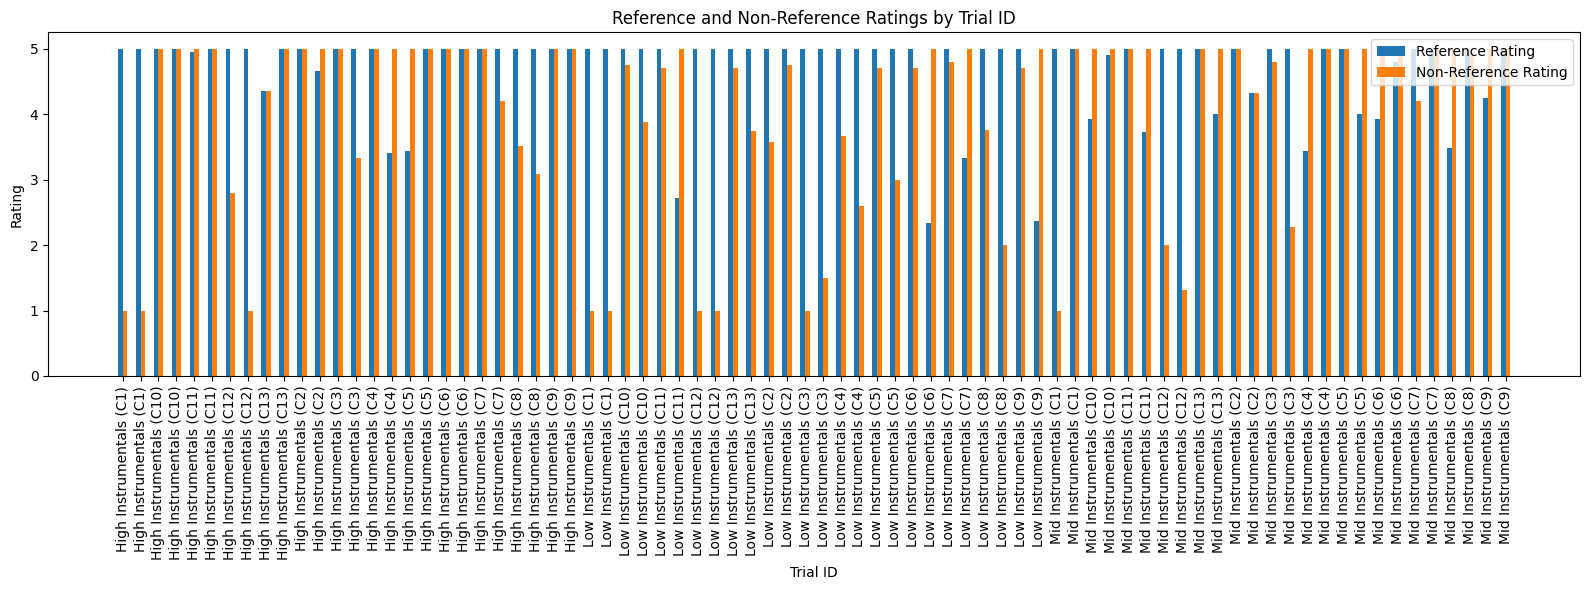

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV into a DataFrame
df = pd.read_csv('sorted_output.csv')

# Sort the DataFrame by trial_id
df_sorted = df.sort_values(by='trial_id')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(16, 6))

# Calculate the number of bars
num_bars = len(df_sorted)

# Set the width of each bar and the spacing between groups of bars
bar_width = 0.4
spacing = 1.5  # Adjust the spacing factor as needed

# Calculate the positions for the bars
bar_positions_ref = np.arange(num_bars) * spacing - bar_width / 2
bar_positions_non_ref = np.arange(num_bars) * spacing + bar_width / 2

# Create a bar plot for reference ratings
ax.bar(bar_positions_ref, df_sorted['rating_reference_score'], width=bar_width, label='Reference Rating')

# Create a bar plot for non-reference ratings
ax.bar(bar_positions_non_ref, df_sorted['rating_non_reference_score'], width=bar_width, label='Non-Reference Rating')

# Set the title and labels
ax.set_title('Reference and Non-Reference Ratings by Trial ID')
ax.set_xlabel('Trial ID')
ax.set_ylabel('Rating')

# Set custom x-tick positions and labels
tick_positions = np.arange(num_bars) * spacing
tick_labels = df_sorted['trial_id'].tolist()

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=90)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [44]:
# Read the CSV into a DataFrame
df = pd.read_csv('sorted_output.csv')

# Extract relevant data for plotting
trial_ids = df['trial_id']
reference_scores = df[df['rating_reference'] == 'reference']['rating_reference_score']
non_reference_scores = df[df['rating_reference'] == 'reference']['rating_non_reference_score']

# Group trial IDs by category (Low, Mid, High)
import numpy as np  # Assuming you're working with NumPy arrays

# Original array of trial IDs
trial_ids = trial_ids.unique()

# Define the trial group mapping dictionary
trial_groups = {
    'Low': ['Low Instrumentals'],
    'Mid': ['Mid Instrumentals'],
    'High': ['High Instrumentals']
}

# Initialize an empty dictionary to store the mapped trial IDs
mapped_trials = {}

# Iterate over each trial ID and map it to the corresponding group
for trial_id in trial_ids:
    for group_name, group_prefixes in trial_groups.items():
        if any(trial_id.startswith(prefix) for prefix in group_prefixes):
            if group_name not in mapped_trials:
                mapped_trials[group_name] = []
            mapped_trials[group_name].append(trial_id)

# Convert the lists of mapped trial IDs into NumPy arrays
mapped_trials = {group_name: np.array(trial_list) for group_name, trial_list in mapped_trials.items()}

# Print the mapped trial IDs for each group
#for group_name, trial_list in mapped_trials.items():
    #print(f'{group_name}: {trial_list}')



# Prepare data for grouped bar chart
ref_scores = reference_scores[np.isin(trial_ids, trial_ids, assume_unique=True)]
non_ref_scores = non_reference_scores[np.isin(trial_ids, trial_ids, assume_unique=True)]
plt.bar(index + bar_width, grouped_non_reference_scores, bar_width, label='Non-Reference', color='orange')

plt.xlabel('Frequency Groups')
plt.ylabel('Average Rating Scores')
plt.title('Comparison of Ratings between Reference and Non-Reference (Grouped)')
plt.xticks(index + bar_width / 2, group_labels)
plt.legend()
plt.tight_layout()
plt.show()

IndexError: Boolean index has wrong length: 39 instead of 78